In [2]:
#importing librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # filter the warnings 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
from numpy import genfromtxt
import csv
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC

In [3]:
import pandas as pd

data = pd.read_excel("chronic_kidney_disease1.1.xlsx")

data 

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
data.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,399,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,45,93,50,3,6,4,4,4,3,3
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,70,105,130,251,257,362,316,322,339,248


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      399 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [6]:
data.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       1
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [7]:
# Iterate over each column and fetch the rows number where
for col in data:
    rows = list(data[col][data[col] == "?"].index)
    i=0
    for row in rows:
        print('Index : ', row, ' Col : ', col)
        i=i+1
    print("sum of missing values",i)

Index :  30  Col :  age
Index :  73  Col :  age
Index :  112  Col :  age
Index :  116  Col :  age
Index :  117  Col :  age
Index :  169  Col :  age
Index :  191  Col :  age
Index :  203  Col :  age
Index :  268  Col :  age
sum of missing values 9
Index :  7  Col :  bp
Index :  75  Col :  bp
Index :  132  Col :  bp
Index :  138  Col :  bp
Index :  161  Col :  bp
Index :  164  Col :  bp
Index :  185  Col :  bp
Index :  187  Col :  bp
Index :  188  Col :  bp
Index :  215  Col :  bp
Index :  293  Col :  bp
Index :  316  Col :  bp
sum of missing values 12
Index :  13  Col :  sg
Index :  17  Col :  sg
Index :  21  Col :  sg
Index :  28  Col :  sg
Index :  30  Col :  sg
Index :  37  Col :  sg
Index :  50  Col :  sg
Index :  57  Col :  sg
Index :  59  Col :  sg
Index :  78  Col :  sg
Index :  81  Col :  sg
Index :  82  Col :  sg
Index :  86  Col :  sg
Index :  98  Col :  sg
Index :  99  Col :  sg
Index :  104  Col :  sg
Index :  106  Col :  sg
Index :  109  Col :  sg
Index :  121  Col :  sg
In

In [8]:
total_ids = data.duplicated().sum()
print("There are " + str(total_ids) + " duplicates in the  dataset.")

There are 0 duplicates in the  dataset.


In [9]:
#replacing ? by nan values 
data= data.replace('?',np.nan)

In [10]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [11]:
#formatting dataframe by replacing strings in int
replacements = {
    'poor' : 0.0,
    'good' : 1.0,
    'normal' : 1.0,
    'abnormal' : 0.0,
    'notpresent' : 0.0,
    'present' : 1.0,
    'yes' : 1.0,
    'no' : 0.0,
    'ckd' : 1.0,
    'ckd\t' : 1.0,
    'notckd' : 0.0
}
df_num = data.replace(replacements)
df_num

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    object 
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    float64
 6   pc      335 non-null    float64
 7   pcc     396 non-null    float64
 8   ba      396 non-null    float64
 9   bgr     356 non-null    float64
 10  bu      381 non-null    object 
 11  sc      383 non-null    object 
 12  sod     313 non-null    object 
 13  pot     312 non-null    object 
 14  hemo    348 non-null    object 
 15  pcv     330 non-null    object 
 16  wbcc    295 non-null    object 
 17  rbcc    270 non-null    object 
 18  htn     398 non-null    float64
 19  dm      397 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    float64
 22  pe

In [13]:
X = df_num.loc[:, data.columns != 'class']
X = X.apply(pd.to_numeric, errors='coerce')
data1=X.fillna(X.median())

In [14]:
y = df_num['class']
data2=pd.concat([data1, y], axis=1, join='inner')
data2

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,1.0,1.0,0.0,0.0,121.0,...,44.0,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,1.0,1.0,0.0,0.0,121.0,...,38.0,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31.0,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35.0,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47.0,6700.0,4.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54.0,7800.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49.0,6600.0,5.4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51.0,7200.0,5.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
data2.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data2)
df_tr=scaler.transform(data2)
df=pd.DataFrame(df_tr, columns = data2.columns)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,0.522727,0.230769,0.75,0.2,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.777778,0.231405,0.525424,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.056818,0.000000,0.75,0.8,0.0,1.0,1.0,0.0,0.0,0.211538,...,0.644444,0.157025,0.457627,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.681818,0.230769,0.25,0.4,0.6,1.0,1.0,0.0,0.0,0.856838,...,0.488889,0.219008,0.457627,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.522727,0.153846,0.00,0.8,0.0,1.0,0.0,1.0,0.0,0.202991,...,0.511111,0.185950,0.305085,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,1.0,1.0,0.0,0.0,0.179487,...,0.577778,0.210744,0.423729,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [17]:
X = data2.drop("class", axis=1)
Y = data2["class"]

In [18]:
# get the locations
X = data2.iloc[:, :-1]
Y = data2.iloc[:, -1]
 
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)

In [19]:
len(y_train[y_train==1]), len(y_train[y_train==0]), y_train.shape

(198, 122, (320,))

In [20]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
clf = BernoulliNB()  
acc=[]
prec=[]
rec=[]
fm=[]
skf=StratifiedKFold(n_splits=5,random_state=None)
skf.get_n_splits(X,y)
for train_index,test_index in skf.split(X,Y) :
  X1_train,X1_test = X.iloc[train_index],X.iloc[test_index]
  y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
  clf.fit(X1_train,y1_train.values.ravel())
  prediction=clf.predict(X1_test)
  accuracy=accuracy_score(y1_test,prediction)
  acc.append(accuracy)
  precision = precision_score(y1_test,prediction)
  prec.append(precision)
  recall = recall_score(y1_test,prediction)
  rec.append(recall)
  Fmeas = f1_score(y1_test,prediction)
  fm.append(Fmeas)
  acc1= np.mean(acc)
  prec1=np.mean(prec)
  rec1=np.mean(rec)
  fm1=np.mean(fm)
 
print('Cross Validation accuracy: ' , (acc1))
print('Cross Validation precision: ' , (prec1))
print('Cross Validation recall: ' , (rec1))
print('Cross Validation F_measure: ' , (fm1))

Cross Validation accuracy:  0.9400000000000001
Cross Validation precision:  0.9956521739130434
Cross Validation recall:  0.908
Cross Validation F_measure:  0.949179472899243


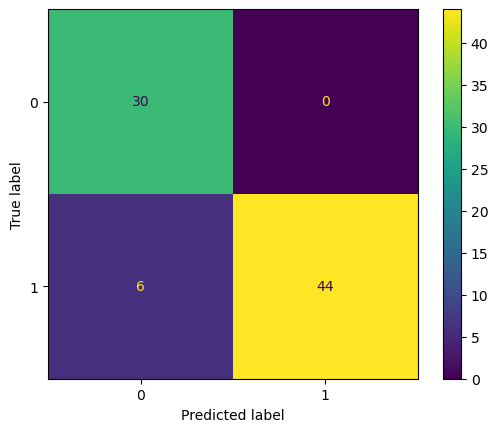

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#  Confusion Matrix
cm1 = confusion_matrix(y1_test,prediction)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.show()

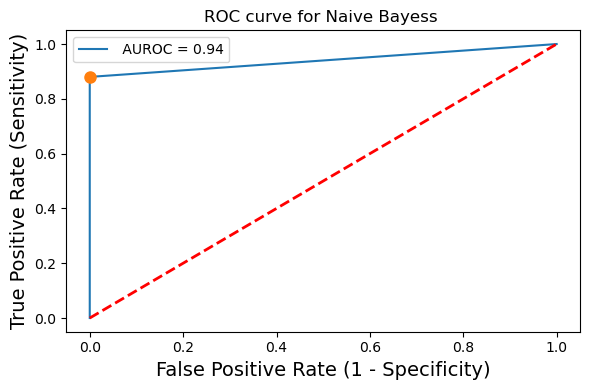

In [22]:
from sklearn.metrics import roc_curve, auc 

fig, (ax2) = plt.subplots(figsize = (6,4))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y1_test,prediction)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Naive Bayess ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

In [35]:
# get the locations
X = data2.iloc[:, :-1]
Y = data2.iloc[:, -1]
 
# split the dataset
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.3, random_state=0)
#With random_state=0 , we get the same train and test sets across different executions

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import SVR, SVC, LinearSVC
from sklearn import svm

In [37]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(x_train, y_train)

SVC(kernel='linear')

In [38]:
Y_pred = clf_svm.predict(x_test)

svm_acc = accuracy_score(y_test, Y_pred)
from sklearn.metrics import classification_report

print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94        48
         1.0       0.97      0.94      0.96        72

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



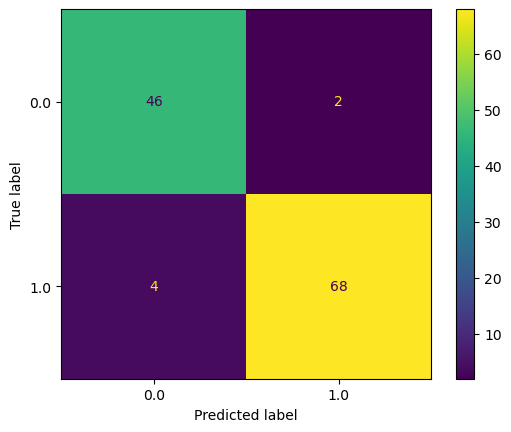

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, Y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=clf_svm.classes_)
disp.plot()
plt.show()

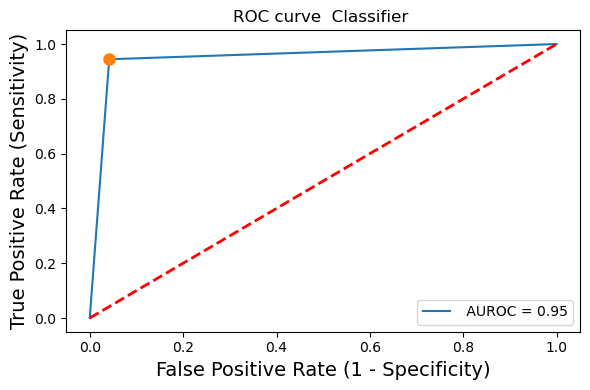

In [40]:
from sklearn.metrics import roc_curve, auc 

fig, (ax2) = plt.subplots(figsize = (6,4))
        #roc-curve
fpr, tpr, thresholds_roc = roc_curve(y_test, Y_pred)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve  Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()